## Magister en Data Science, UDD 2019
# Estadísticas para Data Science

---

__Objetivo:__ Exploración de datos

__Entrega:__ Martes 20 de agosto, hasta las 23:59hrs.

__Profesor:__  Rafael Ascanio

__Alumnos:__  Roy Barrera, José Pérez

---

## 1. Exploración de datos

1. Importamos un set de datos para realizar la exploración de los mismos.

In [1]:
import pandas as pd  # Panda nos permite leer y manejar un set de datos desde un archivo
import warnings
warnings.filterwarnings('ignore')

mi_dataset = pd.read_csv('DEF_2017.csv', low_memory=False) # Base de Defunciones en Chile 2017, fuente INE. 


---

2. Para tratar de *"entender los datos"*, primero vemos su estructura, es decir las columnas

In [2]:
# Lista de las variables

print(mi_dataset.columns)


Index(['DIA_NAC', 'MES_NAC', 'ANO1_NAC', 'ANO2_NAC', 'SEXO', 'EST_CIVIL',
       'EDAD_TIPO', 'EDAD_CANT', 'CURSO_INS', 'NIVEL_INS', 'ACTIV', 'OCUPA',
       'CATEG', 'DIA_DEF', 'MES_DEF', 'ANO_DEF', 'LOCAL_DEF', 'COMUNA',
       'URBA_RURAL', 'DIAG1', 'DIAG2', 'AT_MEDICA', 'CAL_MEDICO', 'FUND_CAUSA',
       'PESO', 'GESTACION', 'NUTRITIVO', 'EDAD_M', 'EST_CIV_MA', 'HIJ_VIVOS',
       'HIJ_FALL', 'HIJ_MORT', 'HIJ_TOTAL', 'PARTO_ABOR', 'DIA_PARTO',
       'MES_PARTO', 'ANO_PARTO', 'ACTIV_MA', 'OCUPA_MA', 'CATEG_MA',
       'CURSO_MA', 'NIVEL_MA', 'EDAD_PADRE', 'ACTIV_PA', 'OCUPA_PA',
       'CATEG_PA', 'CURSO_PA', 'NIVEL_PA', 'REG_RES', 'SERV_RES'],
      dtype='object')




3. Luego vemos el contenido de las primeras y ultimas filas del set de datos, para hacernos una idea...

In [3]:
# Primeras lineas del set de datos (HEAD)

mi_dataset.head(5)


,DIA_NAC,MES_NAC,ANO1_NAC,ANO2_NAC,SEXO,EST_CIVIL,EDAD_TIPO,EDAD_CANT,CURSO_INS,NIVEL_INS,...,CURSO_MA,NIVEL_MA,EDAD_PADRE,ACTIV_PA,OCUPA_PA,CATEG_PA,CURSO_PA,NIVEL_PA,REG_RES,SERV_RES
0,14.0,9,19,24,2,2,1,92,0,5,...,0,0,0,0,,0,0,0,13,10
1,3.0,7,19,12,1,2,1,104,0,5,...,0,0,0,0,,0,0,0,13,10
2,25.0,10,19,52,1,4,1,64,4,4,...,0,0,0,0,,0,0,0,13,10
3,17.0,8,19,54,2,2,1,62,4,4,...,0,0,0,0,,0,0,0,13,10
4,15.0,6,19,28,1,2,1,88,0,5,...,0,0,0,0,,0,0,0,13,10


In [4]:
# Últimas lineas del set de datos (TAIL)

mi_dataset.tail(5)

,DIA_NAC,MES_NAC,ANO1_NAC,ANO2_NAC,SEXO,EST_CIVIL,EDAD_TIPO,EDAD_CANT,CURSO_INS,NIVEL_INS,...,CURSO_MA,NIVEL_MA,EDAD_PADRE,ACTIV_PA,OCUPA_PA,CATEG_PA,CURSO_PA,NIVEL_PA,REG_RES,SERV_RES
106383,30.0,7,19,22,1,2,1,95,2,3,...,0,0,0,0,,0,0,0,13,12
106384,12.0,2,19,25,2,2,1,92,5,1,...,0,0,0,0,,0,0,0,13,12
106385,29.0,5,19,14,2,1,1,103,2,3,...,0,0,0,0,,0,0,0,13,12
106386,27.0,8,19,24,2,1,1,93,6,3,...,0,0,0,0,,0,0,0,13,12
106387,11.0,7,19,51,1,1,1,66,4,1,...,0,0,0,0,,0,0,0,13,12


__Observación 1__ :
- El set de datos contiene 50 columnas, 106.388 registros desde la fila 0 a la 106.387.
- Algunas columnas contienen datos cuantificables, 
- Otros son cualitativos, como : SEXO, EST_CIVIL, DIAG1, etc.

---

Según el INE : http://www.deis.cl/wp-content/uploads/2017/04/EsquemaRegistroDefunciones.pdf

- DIA_NAC : Día de la fecha de nacimiento
- MES_NAC : Mes de la fecha de nacimiento
- ANO1_NAC : Dos primeros caracteres del año de la fecha de nacimiento
- ANO2_NAC : Tercer y cuarto carácter del año de la fecha de nacimiento
- ANO_INS : Año de la fecha de inscripción
- SEXO : Código que identifica el sexo del Fallecido
    - 1= Hombre
    - 2= Mujer
    - 9= Indeterminado
- EST_CIVIL : Código del Estado Civil
    - 1= Soltero
    - 2= Casado
    - 3= Viudo
    - 4= Divorciado
    - 9= Ignorado
- EDAD_TIPO : Tipo de edad
    - 1=Años
    - 2=Meses
    - 3=Días
    - 4= Horas y Minutos
- EDAD_CANT : Edad cantidad

...

- DIAG1 : Causa básica de defunción. (Desde 1997 se comienza a Codificar con la CIE 10)
- DIAG2 : Causa externa de defunción. (Desde 1997 se comienza a codificar con la CIE 10)

NOTA : según CIE10, http://www.deis.cl/wp-content/uploads/2013/08/Volume-1-CIE-10-2016-cha.pdf

Para Diag2 :X60x-X84x suicido (lesiones autoinflingidas)

...

- DIA_DEF : Día de la fecha de defunción
- MES_DEF : Mes de la fecha de defunción
- ANO_DEF : Año de la fecha de defunción

...

- LOCA_DEF : Lugar de ocurrencia defunción, domicilio, establecimiento de salud, Otro lugar
- FUND_CAUSA : Fundamento de la causa
    - 1= Autopsia
    - 2= Biopsia
    - 3= Operación
    - 4= Ex. Laboratorio
    - 5= Cuadro Clínico
    - 6= Información de Testigos
- REG_RES : Región de residencia
    - Regiones Códigos
        - De Arica y Parinacota 15
        - De Tarapacá 1
        - De Antofagasta 2
        - De Atacama 3
        - De Coquimbo 4
        - De Valparaíso 5
        - Del Libertador Bernardo O’ Higgins 6
        - Del Maule 7
        - Del Biobío 8
        - De la Araucanía 9
        - De los Lagos 10
        - De Aisén del General Carlos Ibáñez del campo 11
        - De Magallanes y de la Antártica Chilena 12
        - Región Metropolitana de Santiago 13
        - De los Ríos 14

...

--- 

4. Podemos realizar un analisis preliminar (estadística descriptiva) de los datos __CUANTITATIVOS__, para ver "su calidad"  (para entenderlos).

La función __describe__ nos entrega para cada columna, los siguientes valores :
- __count__ : la cantidad de elementos (datos) en la muestra, 
- __mean__ (media o promedio) y __std__ (desviacion standard), que nos permiten calcular el __Coeficiente de Variacion__ -
- __min__ y __max__ que nos permiten obtener el __Rango__ o __Recorrido__
- los __cuartiles__ (25%, 50% y 75%)
- El segundo cuartil (__Q2__) corresponde a la __mediana__


In [5]:
import statistics

mi_dataset[['EDAD_CANT']].describe()  # El dato CUANTITATIVO que nos interesa analizar, como nuestra variable 


,EDAD_CANT
count,106388.000000
mean,71.958943
std,19.241005
min,1.000000
25%,63.000000
50%,76.000000
75%,86.000000
max,999.000000


__Observación 2:__ Nos encontramos con __*Data Sucia*__, ya que la columna EDAD_CANT tiene valores que no corresponden solo a Años y además contiene valores "fuera de escala", como 999. Se toma el acuedo de "hacernos cargo", limpiar la data aplicando un par de filtros por SEXO y EDAD en Años. Además limitar el número de columnas a un dato cuantitativo y un par de cualitativos que nos pareció interesante revisar.

In [6]:
edad_en_anios = mi_dataset['EDAD_TIPO'] == 1   # Consideramos Edad en Años
edad_normal = mi_dataset['EDAD_CANT'] <= 120   # Nos parece razonable, una edad máxima de 120 años
hombre = mi_dataset['SEXO'] == 1               
mujer = mi_dataset['SEXO'] == 2 

new_dataset = mi_dataset[edad_en_anios & edad_normal & ( hombre | mujer )]  # varones y mujeres hasta 120 años 

df = new_dataset[{'SEXO', 'COMUNA', 'EDAD_CANT', 'DIAG1', 'DIAG2', 'MES_DEF', 'REG_RES'}]  # edad y otros calificadores


In [7]:
df.shape # El Data set a usar tiene 104.830 líneas y 7 columnas.

(104830, 7)

In [8]:
df.columns # Las 7 columnas del Data set son:

Index(['COMUNA', 'REG_RES', 'DIAG2', 'MES_DEF', 'EDAD_CANT', 'SEXO', 'DIAG1'], dtype='object')

De esta manera : reducimos la cantidad de filas y columnas del dataframe original.

In [9]:
df.head()  # Miramos las primeras filas del set de datos.

,COMUNA,REG_RES,DIAG2,MES_DEF,EDAD_CANT,SEXO,DIAG1
0,13501,13,NaN,1,92,2,D689
1,13501,13,NaN,1,104,1,J440
2,13501,13,NaN,6,64,1,I710
3,13501,13,NaN,6,62,2,I739
4,13501,13,NaN,6,88,1,I219


In [10]:
df.tail() # Miramos las últimas filas del set de datos.

,COMUNA,REG_RES,DIAG2,MES_DEF,EDAD_CANT,SEXO,DIAG1
106383,13120,13,NaN,11,95,1,J960
106384,13120,13,NaN,11,92,2,I64X
106385,13120,13,NaN,11,103,2,E119
106386,13120,13,NaN,11,93,2,I269
106387,13120,13,NaN,11,66,1,I219


---
Se vuelve a verificar el dato cuantitativo (EDAD en años) para como ha cambado.

In [11]:
df[{'EDAD_CANT'}].describe()  

,EDAD_CANT
count,104830.000000
mean,72.940628
std,17.318601
min,1.000000
25%,64.000000
50%,76.000000
75%,86.000000
max,113.000000


__Observación 3__ :
La edad promedio del univero es 72,94 años, es decir, casi 73 años.  mientras que la mediana (que coincide con el segundo cuartil) se situa en 76 años. 

5. Se pueden obtener otros indicadores, por ejemplo la __mediana__, la __varianza__ o la __moda__ de una columna en particular.
 - La __mediana__ es el que divide en 2 grupos al set de datos. 
 - La __varianza__ mide qué tan dispersos están los datos alrededor de la __media__.
 - la __moda__ nos dice el valor (o valores) que se repite(n) más veces en una muestra.

In [12]:
print('Con relación a la variable Edad de Defunción años 2017 en Chile, se puede decir')
print('La mediana es  : %d años'%(df['EDAD_CANT'].median()))
# Varianza : es igual a la desviación estándar elevada al cuadrado.
print('La varianza es : %.4f'%(df['EDAD_CANT'].var()))
print('La moda es     : %d años'%(df['EDAD_CANT'].mode()))
print('El C.V. es     : %.4f '%(df['EDAD_CANT'].std()/df['EDAD_CANT'].mean()))
print('El Rango es    : %d años'%(df['EDAD_CANT'].max()-df['EDAD_CANT'].min()))


Con relación a la variable Edad de Defunción años 2017 en Chile, se puede decir
La mediana es  : 76 años
La varianza es : 299.9339
La moda es     : 86 años
El C.V. es     : 0.2374 
El Rango es    : 112 años


In [13]:
import collections

cuenta = collections.Counter(df['EDAD_CANT'])  # Se realiza una cuenta de la cantidad de personas fallecidas en 2017,
                                               # según su edad en años.

lista=sorted(cuenta)

for i in lista:
    print('Edad de defunción :',i,'# de ocurrencias :',cuenta[i])


Edad de defunción : 1 # de ocurrencias : 95
Edad de defunción : 2 # de ocurrencias : 49
Edad de defunción : 3 # de ocurrencias : 40
Edad de defunción : 4 # de ocurrencias : 39
Edad de defunción : 5 # de ocurrencias : 24
Edad de defunción : 6 # de ocurrencias : 25
Edad de defunción : 7 # de ocurrencias : 26
Edad de defunción : 8 # de ocurrencias : 39
Edad de defunción : 9 # de ocurrencias : 29
Edad de defunción : 10 # de ocurrencias : 26
Edad de defunción : 11 # de ocurrencias : 30
Edad de defunción : 12 # de ocurrencias : 40
Edad de defunción : 13 # de ocurrencias : 32
Edad de defunción : 14 # de ocurrencias : 48
Edad de defunción : 15 # de ocurrencias : 58
Edad de defunción : 16 # de ocurrencias : 91
Edad de defunción : 17 # de ocurrencias : 111
Edad de defunción : 18 # de ocurrencias : 128
Edad de defunción : 19 # de ocurrencias : 154
Edad de defunción : 20 # de ocurrencias : 151
Edad de defunción : 21 # de ocurrencias : 167
Edad de defunción : 22 # de ocurrencias : 206
Edad de defun

__Observación 4__ : Nos llama la atención que la expectativa de vida en 2017 era alta, dado que la mayor cantidad de defunciones (sin considerar la causa) ocurrió alrededor de los 80 años.

6. Se grafica el set de datos, para analizar -por ejemplo- la simetria y la curtosis.

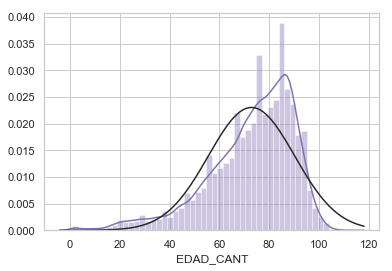

In [17]:
from scipy import stats
import seaborn as sns  # libreria que nos permite graficar y analizar visualmente los datos

# Histograma
sns.set(color_codes=True)
sns.set(style="whitegrid")

#sns.distplot(df['EDAD_CANT'],fit=stats.gamma, color='m' );  # para ver como se ajusta a una distribucion gama
sns.distplot(df['EDAD_CANT'],fit=stats.norm, color='m') ; # para ver como se ajusta a una distribucion normal


In [18]:
# Simetría y kurtosis
# Se crean funciones que permiten analizar la kurtosis y la asimetría

'''Se define la función kurt() devuelve la clasificación de la Kurtosis según el
   coeficiente de kurtosis. Se considera que el valor es 0 cuando -0.05 < valor < 0.05.
'''
def kurt(valor=0.0):
    if valor>-0.05 and valor<0.05:
        s='Mesocúrtica'
    else:
        if valor<=-0.05:
            s='Platicúrtica'
        else:
            s='Leptocúrtica'
    return s

'''Se define la función asim() devuelve la clasificación de la Asimetría según el
   coeficiente de asimetría. Se considera que el valor es 0 cuando -0.05 < valor < 0.05.
'''
def asim(valor=0.0):
    if valor>-0.05 and valor<0.05:
        s='Simétrica.'
    else:
        if valor<=-0.05:
            s='Asimétrica a la izquierda.'
        else:
            s='Asimétrica a la derecha.'
    return s

print("Simetría: %f" % df['EDAD_CANT'].skew())
print("Kurtosis: %f" % df['EDAD_CANT'].kurt())

print("La data es", kurt(df['EDAD_CANT'].kurt()), "y", asim(df['EDAD_CANT'].skew()))

Simetría: -1.083134
Kurtosis: 1.259979
La data es Leptocúrtica y Asimétrica a la izquierda.


---
7. Nos ha percido interesante mirar los datos de la EDAD de las personas difuntas en 2017, por el cualificador SEXO.

   - SEXO = 1 es hombre.
   - SEXO = 2 es mujer.

In [19]:
df.groupby(['SEXO'])['EDAD_CANT'].describe()  # Se verifica EDAD (en años), según el calificador SEXO.

,count,mean,std,min,25%,50%,75%,max
SEXO,,,,,,,,
1,54942.0,69.625205,17.597938,1.0,60.0,73.0,83.0,113.0
2,49888.0,76.591926,16.240698,1.0,68.0,80.0,88.0,113.0


__Observación 5__ :

Para las 104.830 personas fallecidas en 2017 :
- 53% varones, 47% mujeres
- La cantidad de varones (SEXO=1) fallecidos fue mayor a la cantidad  de mujeres (SEXO=2)
- El promedio de la edad de las mujeres : 76.6,es superior a la edad de los hombres : 69.6
- La dispersión de la muestra fue mayor entre los hombres  17.6 v/s 16.2
- En ambos casos, el segundo cuartil (50%) no coincide con la media
- En ambos casos, se registro la misma edad máxima.
- En cada rango etareo, hasta los 80 años, el 2017, fallecieron más hombres que mujeres.  sobre los 80 y 90 años esto se   revirtió 

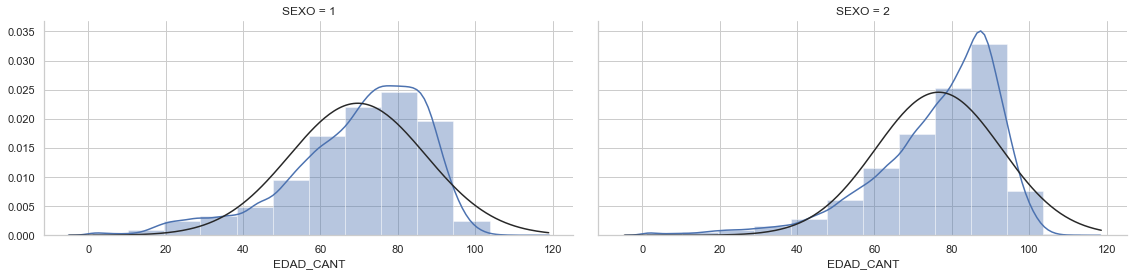

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
#Se grafica la ocurrencias de defunciones, según la edad, aperturado por SEXO. En donde SEXO=1 es hombre, y SEXO=2 es
#mujer.
g = sns.FacetGrid(df,col='SEXO',height=4, aspect=2) 
#g = g.map(plt.hist, 'EDAD_CANT', bins=20 )
g = g.map(sns.distplot, 'EDAD_CANT', bins=12, fit=stats.norm)

__Observación 6__ : el comportamiento de las defunciones, si bien no es EXACTAMENTE una distribución normal, tiende un poco a ella, esto más adelante lo trataremos en la pruebas de hipótesis.

8. Analizando la dispersión de los datos

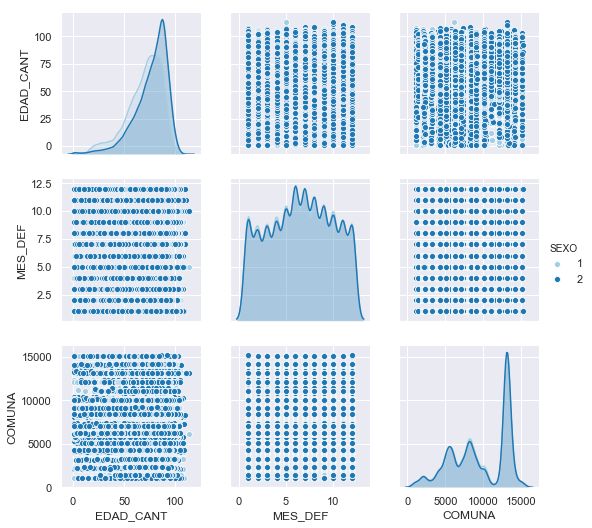

In [26]:
import seaborn as sns  # libreria que permite graficar

lista=['EDAD_CANT','MES_DEF','COMUNA']
sns.pairplot(df,vars=lista,hue='SEXO',palette='Paired')
plt.show();

Otra forma de presentar los datos, podría ser la siguiente :

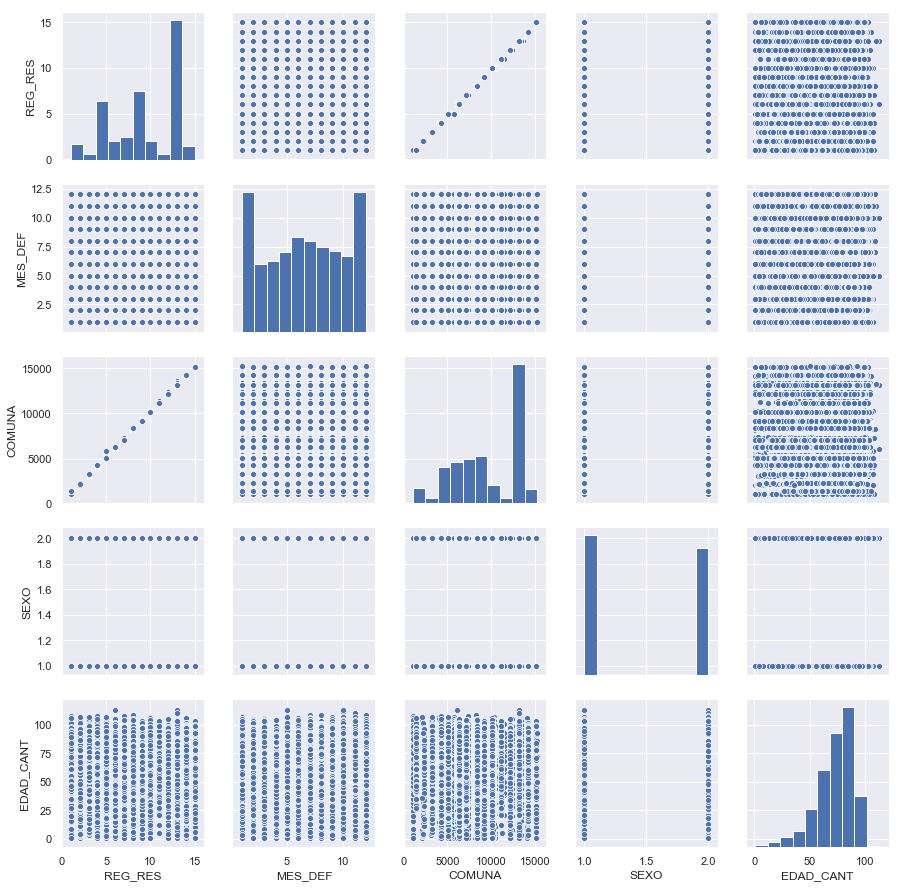

In [22]:
# Diagramas de dispersión
sns.set()
cols = ['DIAG2', 'DIAG1', 'REG_RES', 'MES_DEF', 'COMUNA', 'SEXO', 'EDAD_CANT']
sns.pairplot(df[cols], height = 2.5)
plt.show();

Analizando 2 variables y su dispersión.

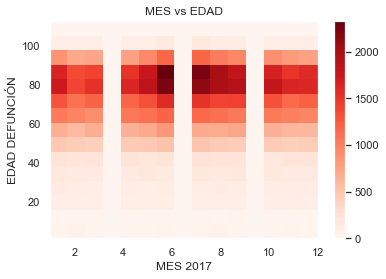

In [23]:
# Diagrama de dispersión para MES_DEF vs EDAD_CANT
import matplotlib.pyplot as plt
import numpy as np
plt.title('MES vs EDAD')
plt.ylabel('EDAD DEFUNCIÓN')
plt.xlabel('MES 2017')
plt.hist2d(df['MES_DEF'], df['EDAD_CANT'], bins=(15, 15), cmap=plt.cm.Reds)
plt.colorbar()
plt.show()

__Observación 7__ : Ya habíamos notado que las defunciones tiende a concentrarse hacia la decada de los ochenta años, y ahora podemos notar que además hay una tendencia marcada en los meses de Junio, Julio, Agosto (los meses de invierno).  
La sabiduría popular nos enseña que "los viejitos deben preocuparse de pasar Agosto", lo que parece confirmarse con la Estadísitica.

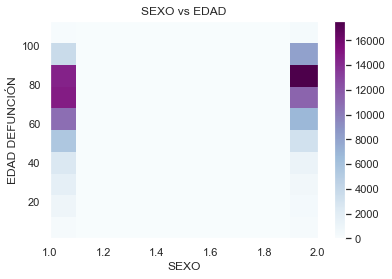

In [27]:
# Diagrama de dispersión para SEXO vs EDAD_CANT
import matplotlib.pyplot as plt
import numpy as np
plt.title('SEXO vs EDAD')
plt.ylabel('EDAD DEFUNCIÓN')
plt.xlabel('SEXO')
#plt.xscale('log')
plt.xlim(0, 4)
plt.hist2d(df['SEXO'], df['EDAD_CANT'], bins=10,  cmap=plt.cm.BuPu)
plt.colorbar()
plt.show()

__Observación 8__ : Si se comparan uno a uno, en todos los rangos etáreos, durante el 2017, mueren más hombres que mujeres, hasta los 80 años, de ahí en más, la tendencia se revirte y mueren más mujeres de 90 y 100 años que hombres de la misma edad.

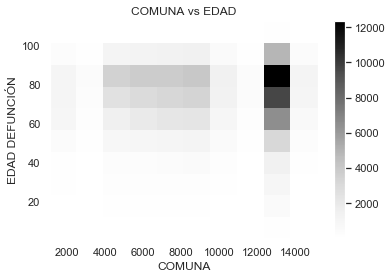

In [28]:
# Diagrama de dispersión para COMUNA vs EDAD_CANT
import matplotlib.pyplot as plt
import numpy as np
plt.title('COMUNA vs EDAD')
plt.ylabel('EDAD DEFUNCIÓN')
plt.xlabel('COMUNA')
plt.hist2d(df['COMUNA'], df['EDAD_CANT'], bins=10,  cmap=plt.cm.Greys)
plt.colorbar()
plt.show()

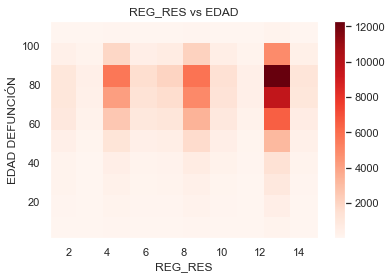

In [29]:
# Diagrama de dispersión para REG_RES vs EDAD_CANT
import matplotlib.pyplot as plt
import numpy as np
plt.title('REG_RES vs EDAD')
plt.ylabel('EDAD DEFUNCIÓN')
plt.xlabel('REG_RES')
plt.hist2d(df['REG_RES'], df['EDAD_CANT'], bins=10,  cmap=plt.cm.Reds)
plt.colorbar()
plt.show()

__Observación 9__  : En la primera gráfica : Independiente de la edad o la causa, las defunciones tienden a concentrarse en las comunas de la región metropolitana ( 13000 ), lo cual hace sentido, si se considera que la mayor densidad pobllacional del pais se concentra en esta misma región.    En la siguiente gráfica (por Región) , este fenómeno se aprecia con mayor claridad.

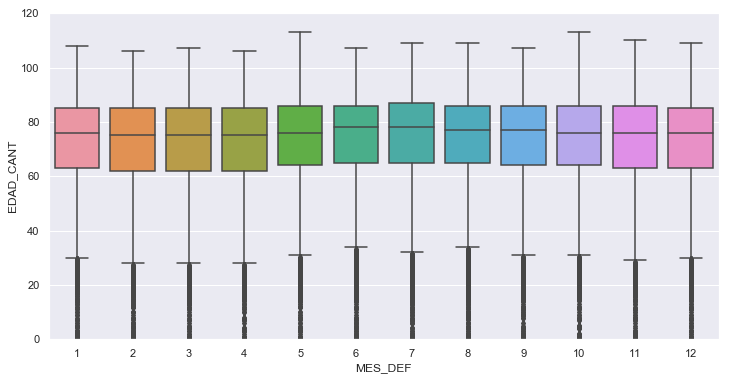

In [30]:
# Diagrama de caja para  Edad_Cant vs MES_DEF
import matplotlib.pyplot as plt
var = 'MES_DEF'
data = pd.concat([df['EDAD_CANT'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 6))
fig = sns.boxplot(x=var, y="EDAD_CANT", data=data)
fig.axis(ymin=0, ymax=120);

__Observación 10__ : Hay outlayer en la grafica, principalmente, debajo del bigote inferior, porque hay muertes en todas las edades, aunque estas tienden a concentrarse, como ya habiamos visto, en la década de los 70-80 años.     Esto habría que analizarlo un poco más en profundidad con apoyo de la literatura experta, para interpretarlo correctamente.

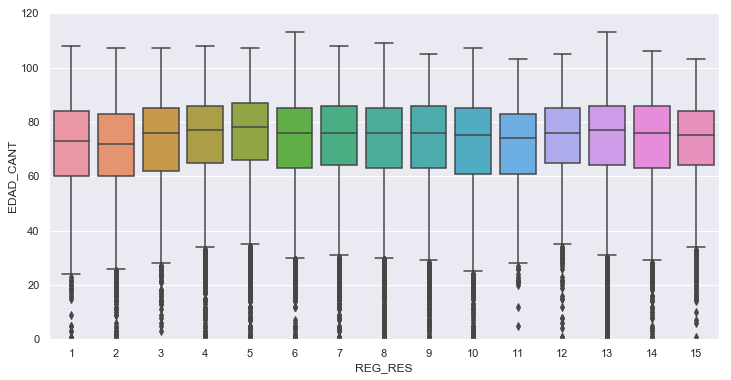

In [31]:
# Diagrama de caja para  EDAD_CANT vs DIAG1
import matplotlib.pyplot as plt
var = 'REG_RES'
data = pd.concat([df['EDAD_CANT'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 6))
fig = sns.boxplot(x=var, y="EDAD_CANT", data=data)
fig.axis(ymin=0, ymax=120);

Idem comentario anterior, es necesario ahondar más en la interpretación, para no errar en el diagnóstico. 

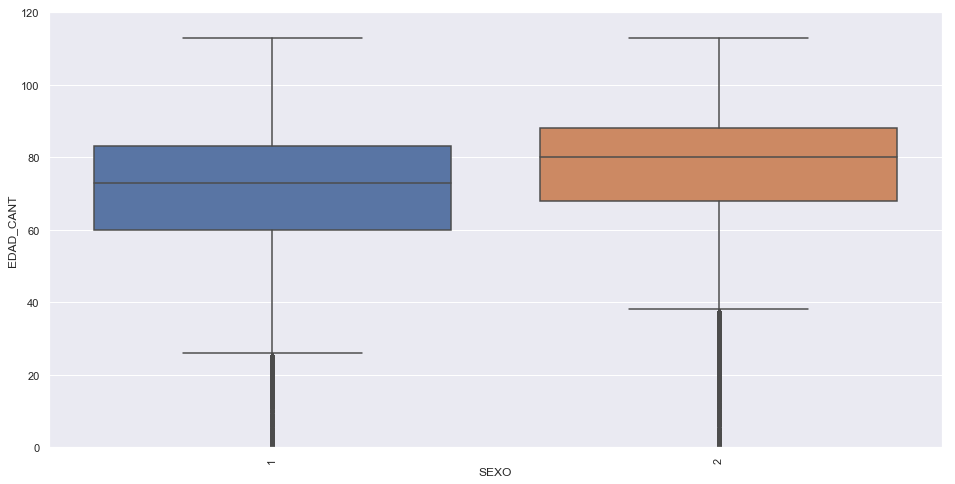

In [32]:
# Grafico de caja EDAD_CANT vs SEXO
var = 'SEXO'
data = pd.concat([df['EDAD_CANT'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="EDAD_CANT", data=data)
fig.axis(ymin=0, ymax=120);
plt.xticks(rotation=90);

__Observación 11__ : Se nota claramente que las mujeres, en 2017, vivieron más años en promedio que los hombres

3.6.  Análisis de correlación

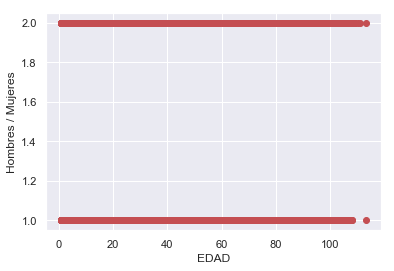

In [33]:
#Se grafica la correlación entre EDAD_CANT vs SEXO
plt.plot(df["EDAD_CANT"],df["SEXO"],"ro")
plt.ylabel("Hombres / Mujeres")
plt.xlabel("EDAD");

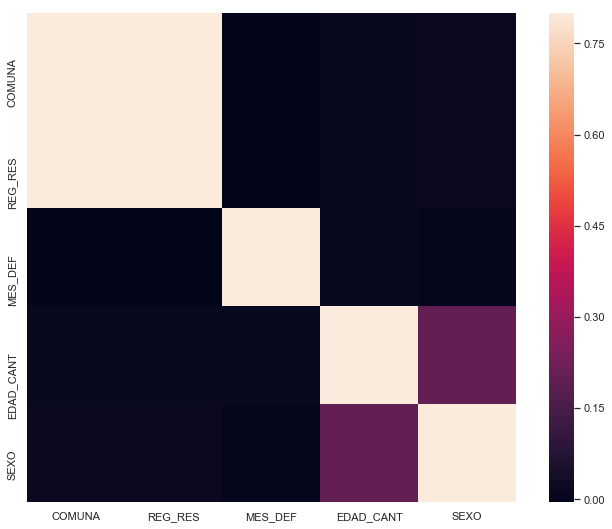

In [34]:
# Se gracfica la matriz de correlaciones y mapa de calor
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Se ve en la gráfica 3 tipos de correlaciones. Correlación positiva fuerte, por ejemplo
Región con Comuna. Relación positiva débil, EDAD_CANT con SEXO y sin correlación como es 
el caso de EDAD_CANT con REG_RES.

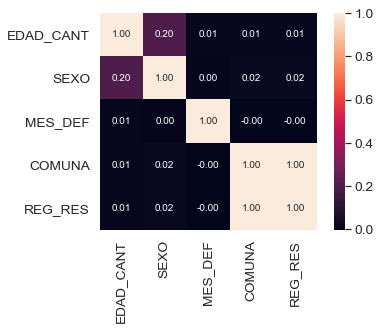

In [35]:
# Se grafica la matriz de correlaciones de cada variable con EDAD_CANT
k = 5 # Cantidad de variables para el mapa de calor
cols = corrmat.nlargest(k, 'EDAD_CANT')['EDAD_CANT'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Se cuantifica la correlación entre las variables del set de datos en estudio. No se ve correlación negativa entre las variables.

3.8 Analisis de los datos perdidos.... que en algunos casos puede ser mas interesante que los datos que si están.

In [36]:
# Datos perdidos
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
DIAG2,97276,0.92794
DIAG1,0,0.00000
SEXO,0,0.00000
EDAD_CANT,0,0.00000
MES_DEF,0,0.00000
REG_RES,0,0.00000
COMUNA,0,0.00000


Los datos perdidos del set de datos usados, dicen relación con la variable DIAG2. La variable DIAG2, no ha sido de interes relevante en la exploración realizada. De lo anterior, entonces no aplica realizar un tratamiento para los datos pérdidos.

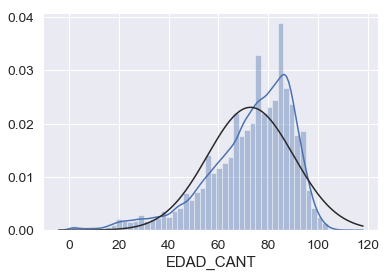

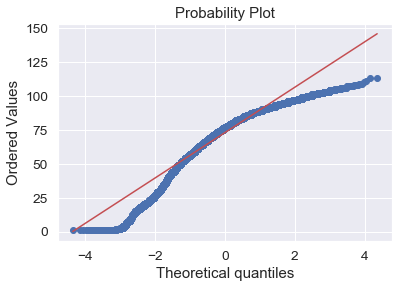

In [37]:
# Exámen de distribución de los datos
from scipy import stats
sns.distplot(df['EDAD_CANT'], fit=stats.norm);
fig = plt.figure()
res = stats.probplot(df['EDAD_CANT'], plot=plt)

---
# 2. Nivel de Confianza

In [38]:
import numpy as np
import pandas as pd
mask_df_h = df['SEXO'] == 1
mask_df_m = df['SEXO'] == 2
df_h = df[mask_df_h]
df_m = df[mask_df_m]

df_hm = np.concatenate((df_h['EDAD_CANT'], df_m['EDAD_CANT']))



print(df_hm.mean())

72.94062768291519


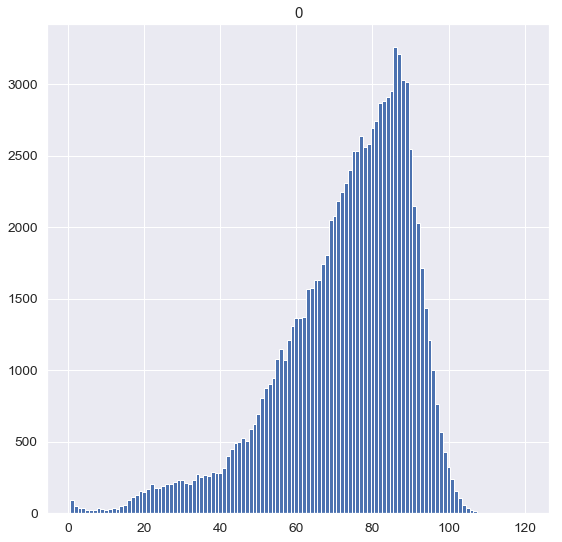

In [39]:
pd.DataFrame(df_hm).hist(bins=120,
                         range=(0.5,120.5),
                         figsize=(9,9));

In [40]:
import math

np.random.seed(12)

sample_size = 1000

intervals = []
sample_means = []

for sample in range(25):
    sample = np.random.choice(a= df_hm, size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    z_critical = stats.norm.ppf(q = 0.975)         

    pop_stdev = df_hm.std()

    stats.norm.ppf(q = 0.025)

    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)

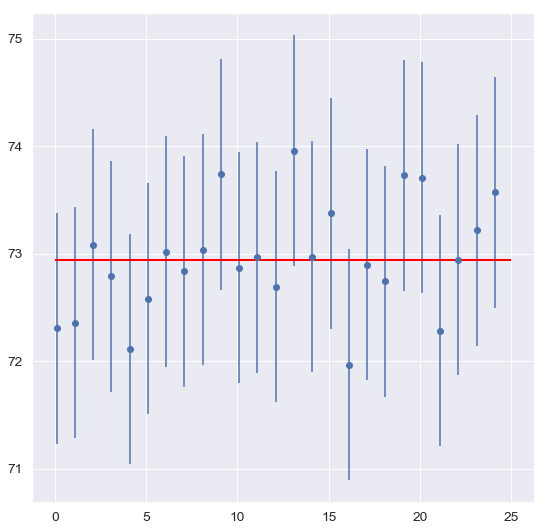

In [41]:
plt.figure(figsize=(9,9))

plt.errorbar(x=np.arange(0.1, 25, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=25,
           y=72.94062768291519, 
           linewidth=2.0,
           color="red");

# 3. Intervalo de Confianza

Una manera de determinar el Intervalo de Confianza es a travez del __Error Estándar__ calculado usando el módulo *Scipy* y el valor cuantil de la distribución *T-STUDENT*, como se muestra a continuación :

In [42]:
from scipy.stats import sem, t
from scipy import mean
confidence = 0.95  # NIVEL DE CONFIANZA

#data = [1, 2, 3, 4, 5] # la muestra
#n = len(data)        # TAMAÑO DE LA MUESTRA
#m = mean(data)       # PROMEDIO
#std_err = sem(data)  # ERROR ESTANDAR : DIVIDE LA DESVIACION STANDARD POR EL CUADRADO DEL TAMAÑO DE LA MUESTRA
#                     # LA DESVIACION ESTANDAR LA DIFERENCIA CON RESPECTO AL PROMEDIO

n = len(df)        # TAMAÑO DE LA MUESTRA
print("Tamaño de la muestra n:", n)

m = mean(df['EDAD_CANT'])       # PROMEDIO
print("Promedio de la variable 'EDAD_CANT' m:", round(m,2))
#print("Promedio de la variable 'EDAD_CANT' m:", round(m,0))

std_err = sem(df['EDAD_CANT'])  # ERROR ESTANDAR : DIVIDE LA DESVIACION STANDARD POR EL CUADRADO DEL TAMAÑO DE LA MUESTRA
                                # EN CAMBIO, LA DESVIACION ESTANDAR, MIDE LA DIFERENCIA CON RESPECTO AL PROMEDIO
print('El Error Estándar es:',round(std_err, 4))

h = std_err * t.ppf((1 + confidence) / 2, n - 1)  # VALOR CUANTIL DE LA DISTRIBUCION T-STUDENT < N-1 : GRADO DE LIBERTAD ASOCIADOS AL VALOR DE T

start = m - h   # LIMITE INFERIOR DE LA MUESTRA
print ('Límite inferior para la muestra es:', round(start, 4))

end = m + h   # LIMITE superior DE LA MUESTRA
print ('Límite superior para la muestra es:', round(end, 4))


Tamaño de la muestra n: 104830
Promedio de la variable 'EDAD_CANT' m: 72.94
El Error Estándar es: 0.0535
Límite inferior para la muestra es: 72.8358
Límite superior para la muestra es: 73.0455


Una forma alternativa de estimar el intervalo de confianza, es mediante el __estadístico Sigma__ para calcular el error estándar, usando la función *norm* del módulo *stats* con un 5% de significancia,  como se muestra a continuación :

In [43]:
# Otra forma de calcular el INTERVALO DE CONFIANZA.
from scipy import stats
import numpy as np
import math 
mean, sigma = np.mean(df['EDAD_CANT']), np.std(df['EDAD_CANT'])

conf_int = stats.norm.interval(0.95, loc=mean, scale=sigma/math.sqrt(len(df)))
print("Promedio de la variable 'EDAD_CANT' m:", round(mean,2))
print("El estadístico sigma es:", round(sigma,2))
print("El Error Estándar sigma/sqrt(Tamaño de la muestra) es:",round(sigma/math.sqrt(len(df)),4) )
print("El límite inferior para la muestra es:",round(conf_int[0],4))
print("El límite superior para la muestra es:",round(conf_int[1],4))

Promedio de la variable 'EDAD_CANT' m: 72.94
El estadístico sigma es: 17.32
El Error Estándar sigma/sqrt(Tamaño de la muestra) es: 0.0535
El límite inferior para la muestra es: 72.8358
El límite superior para la muestra es: 73.0455


Se observa que por ambos métodos el intervalo de confianza calculado, es el mismo

# 4. Prueba de Hipótesis para una muestra (Promedio)

In [44]:
from scipy.stats import ttest_1samp
import numpy as np

edad = df['EDAD_CANT']
#print(edad)
edad_mean = np.mean(edad)
print("El promedio de la variable EDAD_CANT es: ", round(edad_mean,2))


El promedio de la variable EDAD_CANT es:  72.94


In [45]:
H0 = 73 # la hipotesis nula : El promedio es igual a 73 años
tset, pval = ttest_1samp(edad,H0)  
print("El valor del p-value es:", round(pval,4))

ALFA = 0.05 # Valor alfa igual a 0.05 (5%)
print("El valor de significancia alfa es:", ALFA)
if pval < ALFA:
# hipotesis alterna ...
   print("Se rechaza la hipótesis nula, la edad promedio NO es igual a",H0,"años.")
else:
# Hipótesis nula ...
  print("No hay evidencia para rechazar la hipótesis nula. Se acepta que la edad promedio es",H0,"años.")

El valor del p-value es: 0.267
El valor de significancia alfa es: 0.05
No hay evidencia para rechazar la hipótesis nula. Se acepta que la edad promedio es 73 años.


__OBSERVACION__ : Habiendo realizado la prueba de hipótesis, no se rechaza la hipótesis nula y se concluye que la edad promedio de las defunciones de 2017 fue 73 años.

Se realiza una segunda prueba de hipótesis, con una hipótesis nula diferente, esperando obtener un resultado distinto ...

In [46]:
H0 = 80 # la hipótesis nula : El promedio es igual a 80 años
tset, pval = ttest_1samp(edad,H0)  
print("El valor del p-value es:", round(pval,4))

ALFA = 0.05 # Valor alfa igual a 0.05 (5%)
print("El valor de significancia alfa es:", ALFA)
if pval < ALFA:
# hipotesis alterna ...
   print("Se rechaza la hipótesis nula, la edad promedio NO es igual a",H0,"años.")
else:
# Hipótesis nula ...
  print("No hay evidencia para rechazar la hipótesis nula. Se acepta que la edad promedio es",H0,"años.")

El valor del p-value es: 0.0
El valor de significancia alfa es: 0.05
Se rechaza la hipótesis nula, la edad promedio NO es igual a 80 años.


__OBSERVACION__ : Habiendo realizado, a modo de ejercicio, por segunda vez la prueba de hipótesis, se rechaza la hipótesis nula y se concluye que la edad promedio de las defunciones de 2017 NO fue 80 años.

***

# 5. BONUS : Comparación de dos muestras independientes (Promedios)

In [47]:
# Comparación de las Edades de defunciones de Mujeres y Hombres en 2017.
hombres = df [ df['SEXO'] == 1 ]  
mujeres = df [ df['SEXO'] == 2 ]  

edad_hombres = hombres ['EDAD_CANT']
edad_mujeres = mujeres ['EDAD_CANT']

#df_edad = df['EDAD_CANT']
#print(edad_hombres)
#print(edad_mujeres)

print("La edad promedio de defunciones de hombres en 2017 es: %d años" % round(np.mean(edad_hombres),0))
print("La edad promedio de defunciones de mujeres en 2017 es: %d años" % round(np.mean(edad_mujeres),0))
#print(np.mean(edad_mujeres))

La edad promedio de defunciones de hombres en 2017 es: 70 años
La edad promedio de defunciones de mujeres en 2017 es: 77 años


In [48]:
# Importación de librerías
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t
import scipy.stats as stats

# Prueba T de Student para dos muestras independientes
def independent_ttest(data1, data2, alpha):
    mean1, mean2 = mean(data1), mean(data2)   # Cálculo de los promedios
    se1, se2 = sem(data1), sem(data2)         # Cálculo del error estándar de cada muestra 
    sed = sqrt(se1**2.0 + se2**2.0)           # Cálculo del error estándar conjunto
    t_stat = (mean1 - mean2) / sed            # Cálculo del estadístico T
    df = len(data1) + len(data2) - 2          # Grados de libertad
    cv = t.ppf(1.0 - alpha, df)               # Cálculo del valor crítico
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0  # Cálculo del p-value
    return t_stat, df, cv, p                  # Resumen

# Dado que no se recomienda usar 'SEXO' como elemento diferenciador para dos muestras independientes 
# y considerando la data disponible, entonces, para poder llevar a cabo el ejercicio, utilizaremos una
# serie de valores de generación randomica, de edad de defunción, con promedio mu = 75 (años).
# Por otra parte, 'edad' corresponde a la variable 'EDAD_CANT'de nuestra dataframe original 

seed(10)
edad_def_ale = stats.poisson.rvs(loc=0, mu=75, size=len(edad))  # Edad defuncion aleatoria.

print("\n1. Cálculo del estadístico T\n----------------------------\n ")

alpha = 0.05

t_stat, df, cv, p = independent_ttest(edad_def_ale, edad, alpha)
print("Estadístico t=%.3f, Grados de libertad df=%d, Valor crítico cv=%.3f, P-values p=%.3f\n" % (t_stat, df, cv, p))

print("\n2. Interpretación a través del valor crítico\n-------------------------------------------\n")
if abs(t_stat) <= cv:
    print("No se encontraron diferencias significativas entre los promedios de las muestras.")
else:
    print("Se encontraron diferencias significativas (> 5%) entre los promedios de las muestras,\nya que el valor calculado del estadístico T supera -en valor absoluto- \nal cuantil de la respectiva distribución, correspondiente a un nivel de significación del 5%.")

print("\n\n3. Interpretación a través del p-value\n--------------------------------------\n")
if p > alpha:
    print("No se encontraron diferencias significativas entre los promedios de las muestras.")
else:
    print("Se encontraron diferencias significativas (> 5%) entre los promedios de las muestras,\nya que el valor p-value correspondiente al estadístico T calculado, \nes menor que el nivel de significación establecido.")
          


1. Cálculo del estadístico T
----------------------------
 
Estadístico t=34.169, Grados de libertad df=209658, Valor crítico cv=1.645, P-values p=0.000


2. Interpretación a través del valor crítico
-------------------------------------------

Se encontraron diferencias significativas (> 5%) entre los promedios de las muestras,
ya que el valor calculado del estadístico T supera -en valor absoluto- 
al cuantil de la respectiva distribución, correspondiente a un nivel de significación del 5%.


3. Interpretación a través del p-value
--------------------------------------

Se encontraron diferencias significativas (> 5%) entre los promedios de las muestras,
ya que el valor p-value correspondiente al estadístico T calculado, 
es menor que el nivel de significación establecido.


# 6. BONUS : Prueba gráfica de normalidad de los residuales

(0.9658957123756409, 0.0)

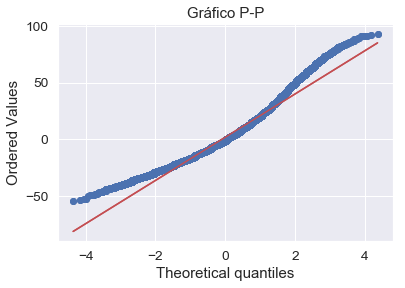

In [49]:
import warnings
warnings.filterwarnings('ignore')

# Prueba gráfica de normalidad de los residuales
diff = edad_def_ale - edad
# print (diff)  no tiene sentido, da todo NaN
stats.probplot(diff, plot= plt)
plt.title('Gráfico P-P')
stats.probplot(diff, plot= plt)
plt.title('Gráfico P-P') 
plt.savefig('Residuales.png')

#Prueba analítica de normalidad de los residuales
stats.shapiro(diff)

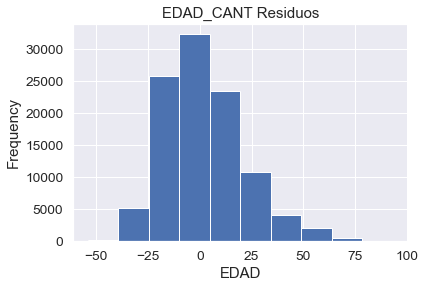

In [50]:
diff.plot(kind= "hist", title= "EDAD_CANT Residuos")
plt.xlabel("EDAD")
plt.savefig("Residuals Plot de EDAD_CANT.png")

# 7. Bonus : Comparación de dos muestras relacionadas 

Una forma de realizar la comparación es usando panda.describe

In [51]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
from scipy import stats

df = new_dataset[{'SEXO', 'COMUNA', 'EDAD_CANT', 'DIAG1', 'DIAG2', 'MES_DEF', 'REG_RES'}]  # edad y otros calificadores

# Estadísticos descriptivos desde pandas.describe()
df.groupby('SEXO')['EDAD_CANT'].describe()

,count,mean,std,min,25%,50%,75%,max
SEXO,,,,,,,,
1,54942.0,69.625205,17.597938,1.0,60.0,73.0,83.0,113.0
2,49888.0,76.591926,16.240698,1.0,68.0,80.0,88.0,113.0


Otra forma de hacerlo, es usnado researchpy, que aporta otra información, por ejemplo el error estándar y el intervalo con un 5% de significación

In [52]:
# Estadísticos descriptivos desde researchpy.summary_cont()
import researchpy as rp
rp.summary_cont(df.groupby('SEXO')['EDAD_CANT'])

,N,Mean,SD,SE,95% Conf.,Interval
SEXO,,,,,,
1,54942,69.625205,17.597938,0.075077,69.478052,69.772358
2,49888,76.591926,16.240698,0.072712,76.449409,76.734443


***